In [221]:
import math
import numpy as np
import warnings
import tqdm
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

## Logistic regression using Object oriented programming

In [208]:
class LogisticRegression():
    def __init__(self,eta,alpha,epochs):
        self.eta = eta
        self.alpha = alpha
        self.epochs = epochs
        self.epochs_ran = 0
        
    def initialize_weights(self,dim):
        self.w = np.arange(dim)
        self.w = np.zeros_like(self.w)
        self.b = 0
        
    def sigmoid(self,z):
        sigmoid=1/(1+(math.e)**(-z))
        return sigmoid
    
    def logloss(self,y_true,y_pred):
        loss=0
        n=len(y_true)
        for i in range(n):
            loss=loss+(y_true[i]*(math.log(y_pred[i],10))+(1-y_true[i])*(math.log(1-y_pred[i],10)))
        loss=loss/(-n)
        return loss
    
    def gradient_dw(self,x,y,w,b,alpha,N):
        dw = -(x*(y-self.sigmoid(np.dot(w,x)+b))-(alpha/N)*w)
        return dw
    
    def gradient_db(self,x,y,w,b):
        db= -(y-self.sigmoid(np.dot(w,x)+b))
        return db
        
    def fit(self,X_train,y_train,X_test,y_test):
        N = X_train.shape[0]
        dim = X_train.shape[1]
        self.initialize_weights(dim)
        alpha = self.alpha
        eta = self.eta
        self.loss_train=[]
        self.loss_test=[]
        epsilon=1e-9
        
        for i in range(self.epochs):
           
            for j in range(N):
                x=X_train[j]
                y=y_train[j]
                g_dw = self.gradient_dw(x,y,self.w,self.b,alpha,N)
                g_db = self.gradient_db(x,y,self.w,self.b)
                self.w = self.w - eta*(g_dw)
                self.b = self.b - eta*(g_db)
                
            y_train_pred=[]
            for k in X_train:
                y_pred=self.sigmoid(np.dot(self.w, k) + self.b)
                if(y_pred==0 or y_pred==1):
                    if(y_pred==0):
                        y_pred=y_pred+epsilon
                    else:
                        y_pred=y_pred-epsilon
                y_train_pred.append(y_pred)
                
            loss1 = self.logloss(y_train,y_train_pred)
            self.loss_train.append(loss1)
            
            y_test_pred=[]
            for k in X_test:
                y_pred=self.sigmoid(np.dot(self.w, k) + self.b)
                if(y_pred==0 or y_pred==1):
                    if(y_pred==0):
                        y_pred=y_pred+epsilon
                    else:
                        y_pred=y_pred-epsilon
                y_test_pred.append(y_pred)
            loss2 = self.logloss(y_test,y_test_pred)
            self.loss_test.append(loss2)
            
            if i>0:
                train_curr_loss=self.loss_train[i]
                train_prev_loss=self.loss_train[i-1]
                test_curr_loss=self.loss_test[i]
                test_prev_loss=self.loss_test[i-1]
                if((train_prev_loss-train_curr_loss<=0.0001) and (test_prev_loss-test_curr_loss<=0.0001)):
                    break
        self.epochs_ran = i+1

In [121]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7,random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [122]:
#please don't change random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=15)

In [123]:
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [209]:
lr = LogisticRegression(eta=0.0001,alpha=0.0001,epochs=50)

In [211]:
lr.fit(X_train,y_train,X_test,y_test)

In [222]:
print(lr.w,lr.b)

[-0.89482323  0.63922609 -0.07409042  0.63113611 -0.38279876  0.9346933
 -0.89664514 -0.07124397  0.41113377  0.41550075  0.24845771  0.05300616
 -0.08703024  0.53952896  0.06749254] -1.3030058566516545


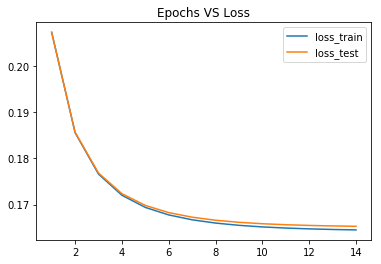

In [213]:
import matplotlib.pyplot as plt
epochs = [i+1 for i in range(len(lr.loss_train))]
plt.plot(epochs,lr.loss_train, label='loss_train')
plt.plot(epochs,lr.loss_test, label='loss_test')
plt.title('Epochs VS Loss')
plt.legend()
plt.show()

## Logistic regression without Object oriented programming

In [172]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    w=np.arange(len(dim))
    #initialize the weights to zeros array of (1,dim) dimensions
    w=np.zeros_like(w)
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    b=0
    #initialize bias to zero

    return w,b

In [173]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
b = 0


In [174]:
import math
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sigmoid=1/(1+(math.e)**(-z))

    return sigmoid

In [175]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    loss=0
    n=len(y_true)
    for i in range(n):
        loss=loss+(y_true[i]*(math.log(y_pred[i],10))+(1-y_true[i])*(math.log(1-y_pred[i],10)))
    loss=loss/(-n)
    return loss

In [176]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw=x*(y-sigmoid(np.dot(w,x)+b))-(alpha/N)*w
    return dw

In [177]:
 def gradient_db(x,y,w,b):
        '''In this function, we will compute gradient w.r.to b '''
        db=y-sigmoid(np.dot(w,x)+b)
        return db

In [215]:
from tqdm import tqdm
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
    w,b = initialize_weights(X_train[0])
    N=len(X_train)
    loss_train=[]
    loss_test=[]
    epsilon=1e-9
    for i in tqdm(range(epochs)):
        for j in range(N):
            x=X_train[j]
            y=y_train[j]
            g_dw = gradient_dw(x,y,w,b,alpha,N)
            g_db = gradient_db(x,y,w,b)
            w = w+eta0*(g_dw)
            b = b+eta0*(g_db)
        #print(w,b)
        y_train_pred=[]
        for k in X_train:
            y_pred=sigmoid(np.dot(w, k) + b)
            if(y_pred==0 or y_pred==1):
                if(y_pred==0):
                    y_pred=y_pred+epsilon
                else:
                    y_pred=y_pred-epsilon
            y_train_pred.append(y_pred)
        loss_train.append(logloss(y_train,y_train_pred))
        y_test_pred=[]
        for k in X_test:
            y_pred=sigmoid(np.dot(w, k) + b)
            if(y_pred==0 or y_pred==1):
                if(y_pred==0):
                    y_pred=y_pred+epsilon
                else:
                    y_pred=y_pred-epsilon
            y_test_pred.append(y_pred)
        loss_test.append(logloss(y_test,y_test_pred))
        if i>0:
            train_curr_loss=loss_train[i]
            train_prev_loss=loss_train[i-1]
            test_curr_loss=loss_test[i]
            test_prev_loss=loss_test[i-1]
            if((train_prev_loss-train_curr_loss<=0.0001) and (test_prev_loss-test_curr_loss<=0.0001)):
                break
    return w,b,loss_train,loss_test

In [216]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,loss_train,loss_test=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)
w,b

 26%|█████████████████████▎                                                            | 13/50 [00:11<00:33,  1.09it/s]


(array([-0.89482323,  0.63922609, -0.07409042,  0.63113611, -0.38279876,
         0.9346933 , -0.89664514, -0.07124397,  0.41113377,  0.41550075,
         0.24845771,  0.05300616, -0.08703024,  0.53952896,  0.06749254]),
 -1.3030058566516545)

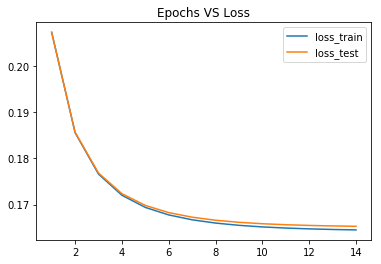

In [180]:
import matplotlib.pyplot as plt
epochs = [i+1 for i in range(len(loss_train))]
plt.plot(epochs,loss_train, label='loss_train')
plt.plot(epochs,loss_test, label='loss_test')
plt.title('Epochs VS Loss')
plt.legend()
plt.show()